In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Data Loading Section (common for all models)

In [2]:
Data = files.upload()
df = pd.read_csv('SalesStore.csv')
print(df.head())
print(df.dtypes)

Saving SalesStore.csv to SalesStore.csv
   Order_Date   Ship_Date Ship_Mode  Postal_Code   Region Product_Reference  \
0  2021-02-15  2021-02-20    Ground        44104  Midwest  OFF-TAP-10022901   
1  2021-02-15  2021-02-20    Ground        44104  Midwest  OFF-TAP-10023012   
2  2021-02-15  2021-02-20    Ground        44104  Midwest  OFF-TAP-10002828   
3  2021-02-15  2021-02-20    Ground        44104  Midwest  OFF-TAP-10022901   
4  2021-02-15  2021-02-20    Ground        44104  Midwest  OFF-TAP-10000482   

          Category Sub_Category  Sales  Quantity  Profit State  
0  Office Supplies         Tape      5         1    0.15    OH  
1  Office Supplies         Tape      5         1    0.15    OH  
2  Office Supplies         Tape      5         1    0.15    OH  
3  Office Supplies         Tape      5         1    0.15    OH  
4  Office Supplies         Tape      5         1    0.15    OH  
Order_Date            object
Ship_Date             object
Ship_Mode             object
Postal_C

# **ARIMA MODEL**

In [3]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

Data Preparation & Cleaning

In [4]:
print(df.dtypes)

Order_Date            object
Ship_Date             object
Ship_Mode             object
Postal_Code            int64
Region                object
Product_Reference     object
Category              object
Sub_Category          object
Sales                  int64
Quantity               int64
Profit               float64
State                 object
dtype: object


Testing for stationarity

In [5]:
result = adfuller(df['Sales'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -3.813332029592692
p-value: 0.0027738186999596575


In [6]:
sales_data = df['Sales']

Plotting for the p,d,q values

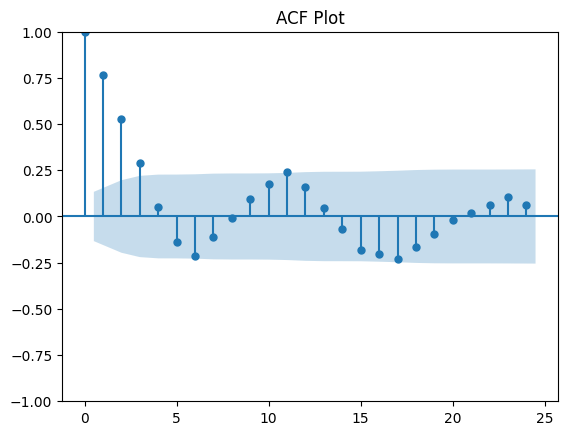

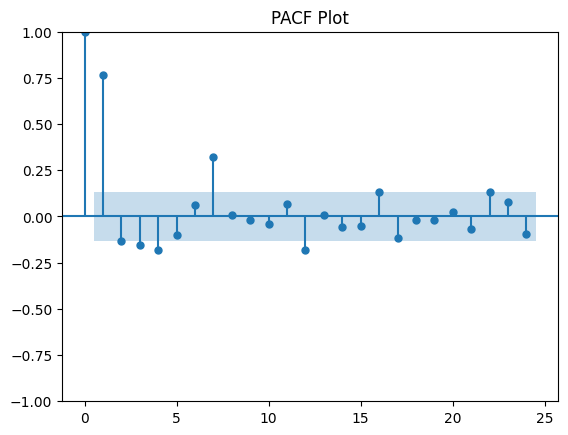

In [7]:
plot_acf(sales_data)
plt.title('ACF Plot')
plt.show()

plot_pacf(sales_data)
plt.title('PACF Plot')
plt.show()

Train the model

In [9]:
model = ARIMA(sales_data, order=(1, 0, 1))
model_fit = model.fit()

Make future predictions

In [10]:
forecast = model_fit.forecast(steps=10)
print(forecast)

216    297.680794
217    295.721239
218    294.326262
219    293.333200
220    292.626254
221    292.122990
222    291.764724
223    291.509680
224    291.328119
225    291.198868
Name: predicted_mean, dtype: float64


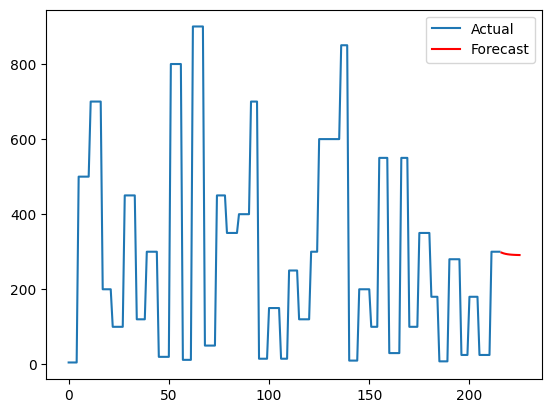

In [11]:
plt.plot(sales_data, label='Actual')
plt.plot(forecast, label='Forecast', color='red')
plt.legend()
plt.show()

# **LSTM**

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

Data Preparation & Cleaning

In [13]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df = df.sort_values(by='Order_Date')
print(df.dtypes)

Order_Date           datetime64[ns]
Ship_Date                    object
Ship_Mode                    object
Postal_Code                   int64
Region                       object
Product_Reference            object
Category                     object
Sub_Category                 object
Sales                         int64
Quantity                      int64
Profit                      float64
State                        object
dtype: object


features and target for time series prediction

In [14]:
features = df[['Quantity', 'Sales', 'Profit']]
target = df['Sales']

In [15]:
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

Creation sequences of data

In [16]:
def create_sequences(data, target, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(target[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 10
X, y = create_sequences(features_scaled, target.values, seq_length)

In [17]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

modelling

In [18]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Train the model

In [19]:
history = model.fit(X_train, y_train, epochs=50, verbose=1, validation_split=0.1)

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - loss: 204049.5938 - val_loss: 127173.6641
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 197216.2188 - val_loss: 127131.6328
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 185789.8594 - val_loss: 127081.4844
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 179600.3750 - val_loss: 127015.7344
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 183558.6094 - val_loss: 126913.3672
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 199486.5312 - val_loss: 126734.8359
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 167582.3281 - val_loss: 126373.1641
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 185351.9844 - val_loss: 125441.4688
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 190804.0000 - val_loss: 121630.1562
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 150555.5000 - val_loss: 105869.5000
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 142927.8906

Make future predictions

In [20]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
Mean Squared Error: 35336.449862134956


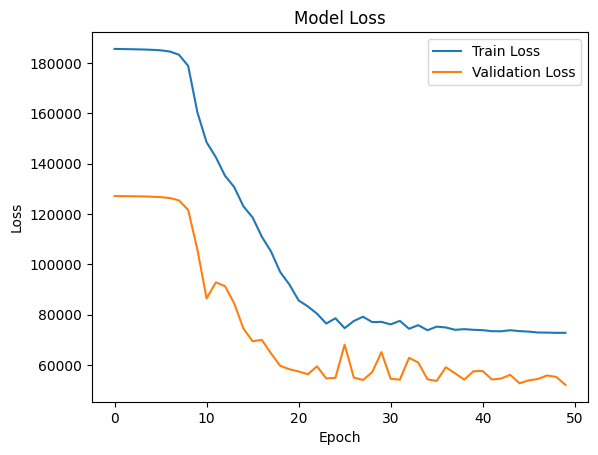

In [21]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# **Facebook Prophet Model**

In [22]:
from prophet import Prophet

Data Preparation & Cleaning

In [23]:
df["Order_Date"] = pd.to_datetime(df["Order_Date"])
df = df[['Order_Date', 'Sales']]

In [24]:
df.columns = ['ds', 'y']

outliers in Sales

In [25]:
df = df[df['y'] < df['y'].quantile(0.99)]

seasonality

In [26]:
df['month'] = df['ds'].dt.month
df['day_of_week'] = df['ds'].dt.dayofweek

Training the model

In [27]:
model = Prophet(seasonality_mode='multiplicative')
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmped2bgfh_/0ue96y8k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmped2bgfh_/45vrsx98.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60083', 'data', 'file=/tmp/tmped2bgfh_/0ue96y8k.json', 'init=/tmp/tmped2bgfh_/45vrsx98.json', 'output', 'file=/tmp/tmped2bgfh_/prophet_modeld56ua3ly/prophet_model-20240915202249.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:22:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:22:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Make future predictions

In [28]:
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


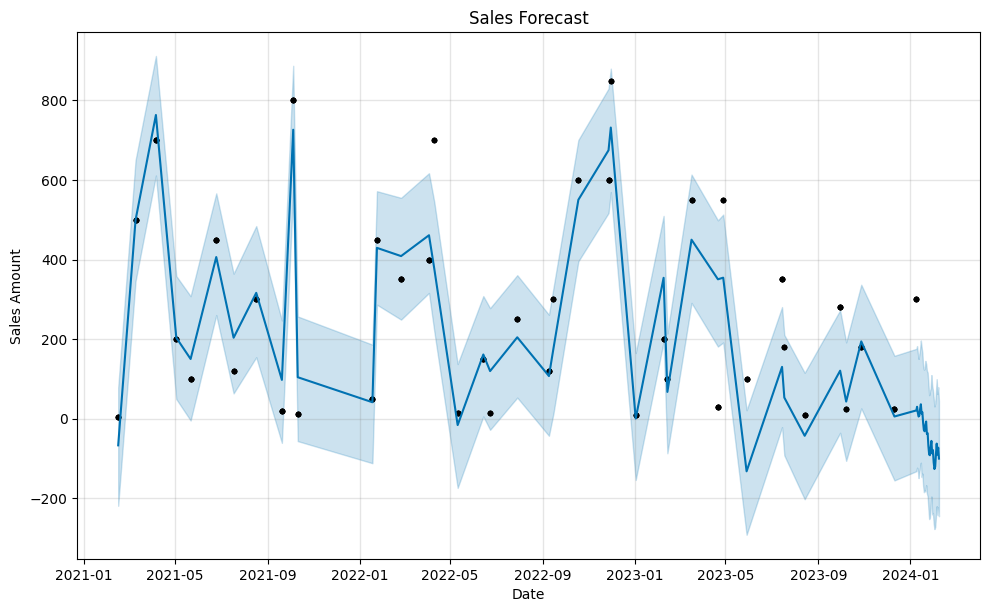

In [29]:
model.plot(forecast)
plt.title('Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.show()

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.ar

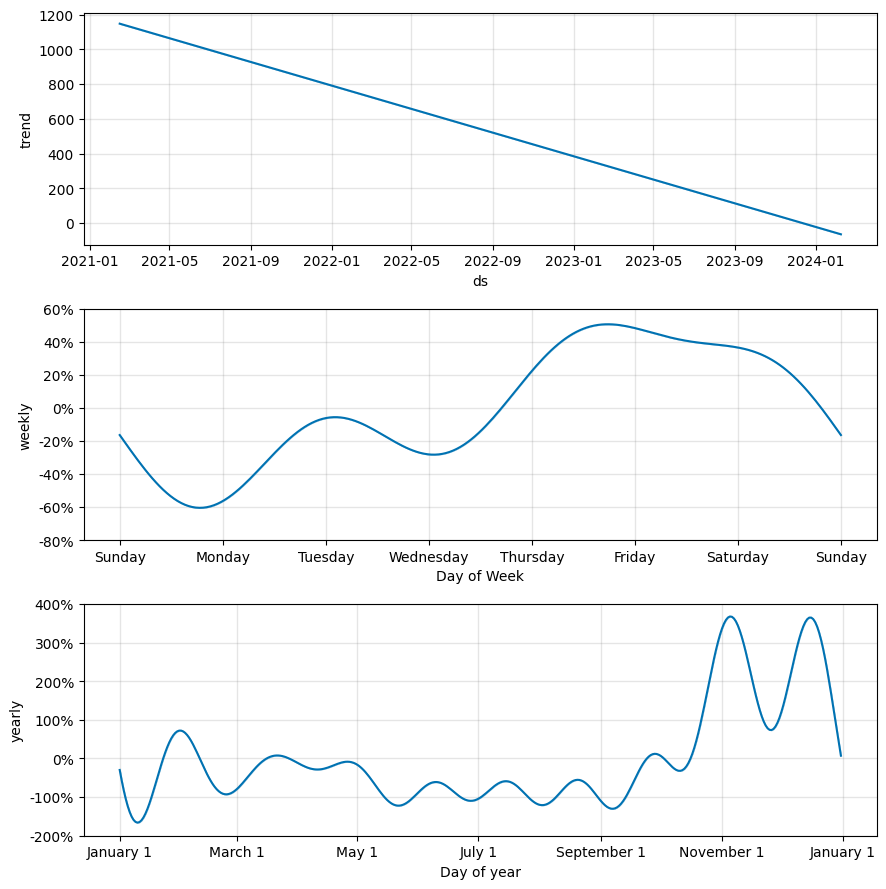

In [30]:
model.plot_components(forecast)
plt.show()